# Energy Requirement

In [2]:
import pandas as pd

In [3]:
energy_data = pd.read_csv('EnergyReq.csv')
print(energy_data)

     Year           State  Requirement (MU)  Availability (MU)
0    1992  Andhra Pradesh           26085.0            24281.0
1    1992   Arunachal PR.             161.1              111.1
2    1992           Assam            2423.7             2040.2
3    1992           Bihar            8220.0             5243.0
4    1992      Chandigarh             628.0              628.0
..    ...             ...               ...                ...
565  2011      Tamil Nadu           85685.0            76705.0
566  2011         Tripura             949.0              900.0
567  2011   Uttar Pradesh           81339.0            72116.0
568  2011     Uttarakhand           10513.0            10208.0
569  2011     West Bengal           38679.0            38281.0

[570 rows x 4 columns]


In [4]:
energy_data.head()

,Year,State,Requirement (MU),Availability (MU)
0,1992,Andhra Pradesh,26085.0,24281.0
1,1992,Arunachal PR.,161.1,111.1
2,1992,Assam,2423.7,2040.2
3,1992,Bihar,8220.0,5243.0
4,1992,Chandigarh,628.0,628.0


In [5]:
# Checking for missing values
print("Missing values in each column:")
print(energy_data.isnull().sum())

Missing values in each column:
Year                 0
State                0
Requirement (MU)     0
Availability (MU)    0
dtype: int64


In [6]:
# Checking data types
print("\nData types of each column:")
print(energy_data.dtypes)


Data types of each column:
Year                   int64
State                 object
Requirement (MU)     float64
Availability (MU)    float64
dtype: object


In [7]:
# Basic statistical summary of the numerical columns
print("\nStatistical summary of numerical columns:")
print(energy_data.describe())


Statistical summary of numerical columns:
              Year  Requirement (MU)  Availability (MU)
count   570.000000        570.000000         570.000000
mean   2002.129825      18651.246667       17013.432982
std       5.942962      23359.367492       20741.167971
min    1992.000000         24.000000          24.000000
25%    1997.000000       1236.000000        1146.500000
50%    2002.000000       9495.000000        8462.500000
75%    2007.000000      29068.750000       26860.750000
max    2011.000000     141382.000000      117722.000000


In [8]:
from scipy import stats

In [9]:
# Calculating the Z-scores for 'Requirement' and 'Availability' columns
energy_data['Requirement_z'] = stats.zscore(energy_data['Requirement (MU)'])
energy_data['Availability_z'] = stats.zscore(energy_data['Availability (MU)'])
# Flagging outliers with Z-scores > 3 or < -3
outliers_z = energy_data[(energy_data['Requirement_z'].abs() > 3) |
                         (energy_data['Availability_z'].abs() > 3)]

In [10]:
print("Outliers detected using Z-scores:")
print(outliers_z)

Outliers detected using Z-scores:
     Year           State  Requirement (MU)  Availability (MU)  Requirement_z  \
312  2004     Maharashtra           92715.0            81541.0       3.173408   
346  2005     Maharashtra          102765.0            84117.0       3.604020   
381  2006     Maharashtra          110005.0            89138.0       3.914232   
416  2007     Maharashtra          114885.0            93846.0       4.123326   
451  2008     Maharashtra          121901.0            95761.0       4.423940   
485  2009     Maharashtra          124936.0           101512.0       4.553981   
521  2010     Maharashtra          128296.0           107018.0       4.697947   
537  2011  Andhra Pradesh           91730.0            85149.0       3.131204   
556  2011     Maharashtra          141382.0           117722.0       5.258642   

     Availability_z  
312        3.113819  
346        3.238126  
381        3.480417  
416        3.707605  
451        3.800014  
485        4.077532  
5

In [11]:
# Dropping the outliers based on Z-scores
energy_data_cleaned = energy_data[(energy_data['Requirement_z'].abs() <= 3) &
                                  (energy_data['Availability_z'].abs() <= 3)]
print("\nData after removing outliers:")
print(energy_data_cleaned.head())


Data after removing outliers:
   Year           State  Requirement (MU)  Availability (MU)  Requirement_z  \
0  1992  Andhra Pradesh           26085.0            24281.0       0.318514   
1  1992   Arunachal PR.             161.1              111.1      -0.792247   
2  1992           Assam            2423.7             2040.2      -0.695301   
3  1992           Bihar            8220.0             5243.0      -0.446947   
4  1992      Chandigarh             628.0              628.0      -0.772242   

   Availability_z  
0        0.350701  
1       -0.815633  
2       -0.722543  
3       -0.567990  
4       -0.790690  


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

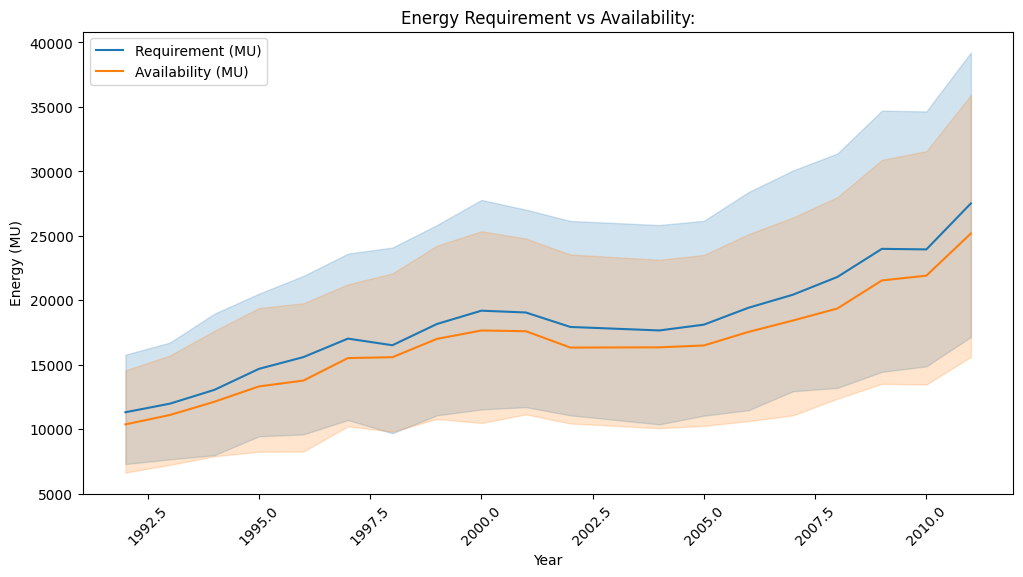

In [14]:
# Plotting the trend of energy requirement and availability (Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=energy_data, x='Year', y='Requirement (MU)', label='Requirement (MU)')
sns.lineplot(data=energy_data, x='Year', y='Availability (MU)', label='Availability (MU)')
plt.title('Energy Requirement vs Availability:')
plt.xlabel('Year')
plt.ylabel('Energy (MU)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

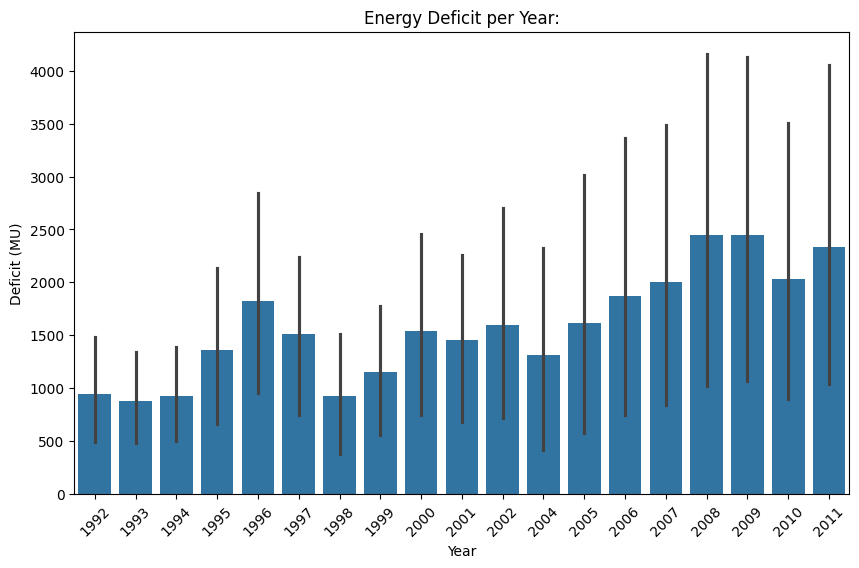

In [15]:
# Energy Deficit per year (Bar Plot)
# Adding a new column for Energy Deficit
energy_data['Deficit (MU)'] = energy_data['Requirement (MU)'] - energy_data['Availability (MU)']
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Deficit (MU)', data=energy_data)
plt.title('Energy Deficit per Year:')
plt.xlabel('Year')
plt.ylabel('Deficit (MU)')
plt.xticks(rotation=45)
plt.show()

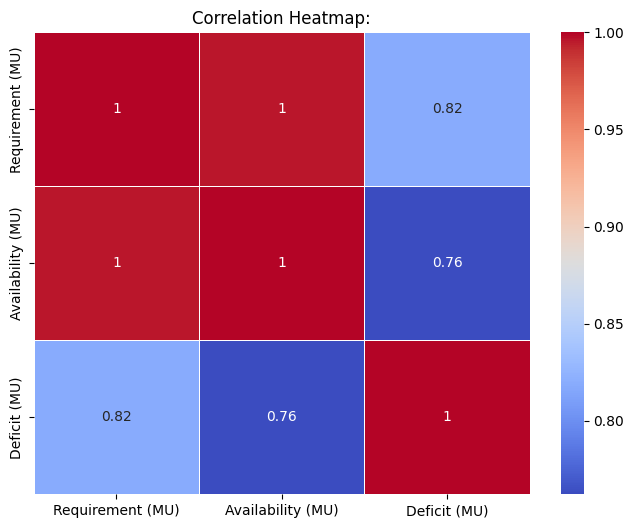

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = energy_data[['Requirement (MU)', 'Availability (MU)', 'Deficit (MU)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap:')
plt.show()

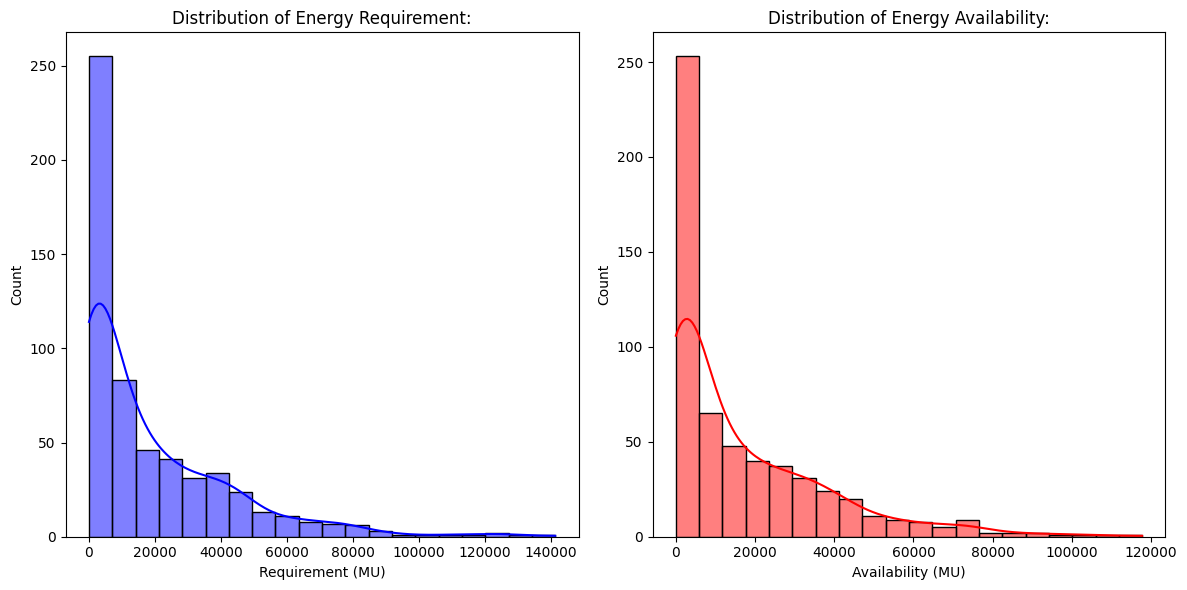

In [17]:
# Distribution of Energy Requirement and Availability - Histograms
plt.figure(figsize=(12, 6))

# Subplot for Requirement (MU)
plt.subplot(1, 2, 1)
sns.histplot(energy_data['Requirement (MU)'], bins=20, color='blue', kde=True)
plt.title('Distribution of Energy Requirement:')

# Subplot for Availability (MU)
plt.subplot(1, 2, 2)
sns.histplot(energy_data['Availability (MU)'], bins=20, color='red', kde=True)
plt.title('Distribution of Energy Availability:')

plt.tight_layout()
plt.show()

# Gross Electricity Generation


In [18]:
electricity_data = pd.read_csv('Gross.Elec.Gen.csv')
print(electricity_data)

FileNotFoundError: [Errno 2] No such file or directory: 'Gross.Elec.Gen.csv'

In [ ]:
# Check the structure of the dataset
print(electricity_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State/Uts.                690 non-null    object 
 1   Year                      690 non-null    int64  
 2   Aluminium                 277 non-null    float64
 3   Aluminium(Primary)        690 non-null    float64
 4   Aluminium  (Secondary)    690 non-null    float64
 5   Automobiles               690 non-null    float64
 6   Cement                    277 non-null    float64
 7   Cement (Primary)          690 non-null    float64
 8   Cement (Secondary)        690 non-null    float64
 9   Chemical                  690 non-null    float64
 10  Colleries                 690 non-null    float64
 11  Elect. Engg.              690 non-null    float64
 12  Fertiliser                690 non-null    float64
 13  Food Products             690 non-null    float64
 14  Heavy Engg

In [ ]:
# Display summary statistics
print(electricity_data.describe())

              Year    Aluminium  Aluminium(Primary)  Aluminium  (Secondary)  \
count   690.000000   277.000000          690.000000              690.000000   
mean   1998.156522   412.419134       -39979.748725           -40133.800580   
std       6.323074  1552.702853        49194.727469            49063.294986   
min    1985.000000     0.000000       -99999.000000           -99999.000000   
25%    1993.000000     0.000000       -99999.000000           -99999.000000   
50%    1998.000000     0.000000            0.000000                0.000000   
75%    2004.000000     0.010000            0.000000                0.000000   
max    2008.000000  8149.680000         5136.210000             4295.600000   

       Automobiles       Cement  Cement (Primary)  Cement (Secondary)  \
count   690.000000   277.000000        690.000000          690.000000   
mean      7.768884   189.297437     -40106.604738       -40142.927725   
std      36.871495   400.464189      49085.473569        49055.538748

In [ ]:
# Check for missing values
missing_values = electricity_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
State/Uts.                    0
Year                          0
Aluminium                   413
Aluminium(Primary)            0
Aluminium  (Secondary)        0
Automobiles                   0
Cement                      413
Cement (Primary)              0
Cement (Secondary)            0
Chemical                      0
Colleries                     0
Elect. Engg.                  0
Fertiliser                    0
Food Products                 0
Heavy Engg                    0
Iron & Steel                413
Iron & Steel (Primary)        0
Iron & Steel (Secondary)      0
Jute                          0
Light Engineering             0
Minerai Oil & Petroleum       0
Mining &Quarrying             0
Misc.                         0
Non Ferrous                   2
Paper                         0
Plastic                      32
Rubber                       32
Sugar                        32
Textile                      37
Total (Calculated)            0
dtype: in

In [ ]:
# Check for duplicates
duplicates = electricity_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [ ]:
print(electricity_data.columns.tolist())

['State/Uts.', 'Year', 'Aluminium', 'Aluminium(Primary)', 'Aluminium  (Secondary)', 'Automobiles', 'Cement', 'Cement (Primary)', 'Cement (Secondary)', 'Chemical', 'Colleries', 'Elect. Engg.', 'Fertiliser', 'Food Products', 'Heavy Engg', 'Iron & Steel', 'Iron & Steel (Primary)', 'Iron & Steel (Secondary)', 'Jute', 'Light Engineering', 'Minerai Oil & Petroleum', 'Mining &Quarrying', 'Misc.', 'Non Ferrous', 'Paper', 'Plastic', 'Rubber', 'Sugar', 'Textile', 'Total (Calculated)']


In [ ]:
unwanted_columns = [
    'Aluminium','Aluminium(Primary)', 'Aluminium  (Secondary)', 'Automobiles',
    'Cement', 'Cement (Primary)','Cement (Secondary)', 'Chemical', 'Colleries','Fertiliser',
    'Food Products','Iron & Steel', 'Iron & Steel (Primary)', 'Iron & Steel (Secondary)',
    'Minerai Oil & Petroleum', 'Mining &Quarrying',
    'Misc.', 'Non Ferrous', 'Plastic', 'Paper', 'Rubber', 'Sugar', 'Textile'
]
# Drop the unwanted columns
electricity_data_cleaned = electricity_data.drop(columns=unwanted_columns)

In [ ]:
print("\nUpdated DataFrame after dropping unwanted columns:")
print(electricity_data_cleaned.info())


Updated DataFrame after dropping unwanted columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State/Uts.          690 non-null    object 
 1   Year                690 non-null    int64  
 2   Elect. Engg.        690 non-null    float64
 3   Heavy Engg          690 non-null    float64
 4   Jute                690 non-null    float64
 5   Light Engineering   690 non-null    float64
 6   Total (Calculated)  690 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 37.9+ KB
None


In [ ]:
print("\nNumber of remaining null values in the DataFrame:")
print(electricity_data_cleaned.isnull().sum())


Number of remaining null values in the DataFrame:
State/Uts.            0
Year                  0
Elect. Engg.          0
Heavy Engg            0
Jute                  0
Light Engineering     0
Total (Calculated)    0
dtype: int64


In [ ]:
from scipy import stats
import numpy as np


In [ ]:
numeric_cols = electricity_data.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(electricity_data[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)  

In [ ]:
electricity_data_cleaned = electricity_data[~outliers]
print(f"Original DataFrame shape: {electricity_data.shape}")
print(f"Cleaned DataFrame shape: {electricity_data_cleaned.shape}")

Original DataFrame shape: (690, 30)
Cleaned DataFrame shape: (586, 30)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

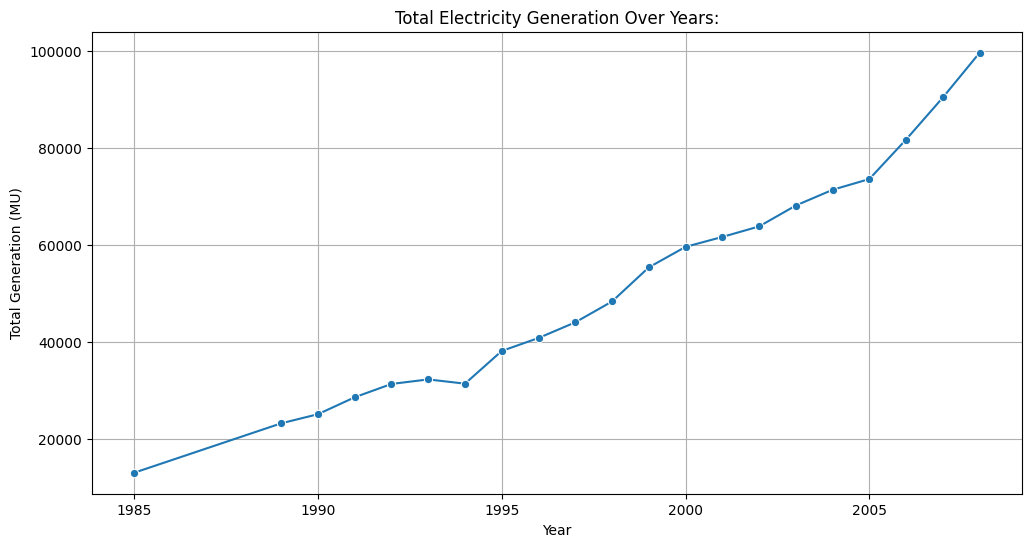

In [ ]:
# Aggregating the data to get total generation per year
time_series_data = electricity_data.groupby('Year').sum(numeric_only=True).reset_index()

# Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_data, x='Year', y='Total (Calculated)', marker='o')
plt.title('Total Electricity Generation Over Years:')
plt.xlabel('Year')
plt.ylabel('Total Generation (MU)')
plt.grid()
plt.show()

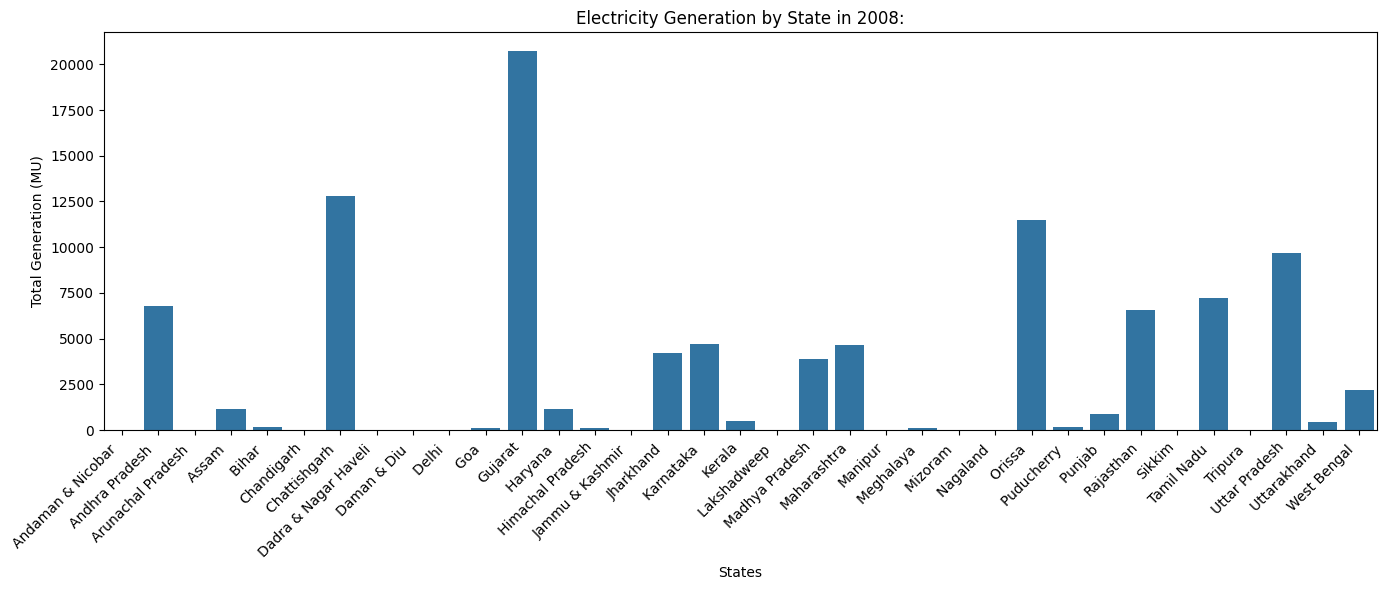

In [ ]:
# State-Wise Electricity Generation Bar Plot
# Let us choose the latest year in the dataset
latest_year = electricity_data['Year'].max()
state_wise_data = electricity_data[electricity_data['Year'] == latest_year]

plt.figure(figsize=(14, 6))
sns.barplot(data=state_wise_data, x='State/Uts.', y='Total (Calculated)')
plt.title(f'Electricity Generation by State in {latest_year}:')
plt.xticks(rotation=45, ha='right')
plt.xlabel('States')
plt.ylabel('Total Generation (MU)')
plt.tight_layout()
plt.show()

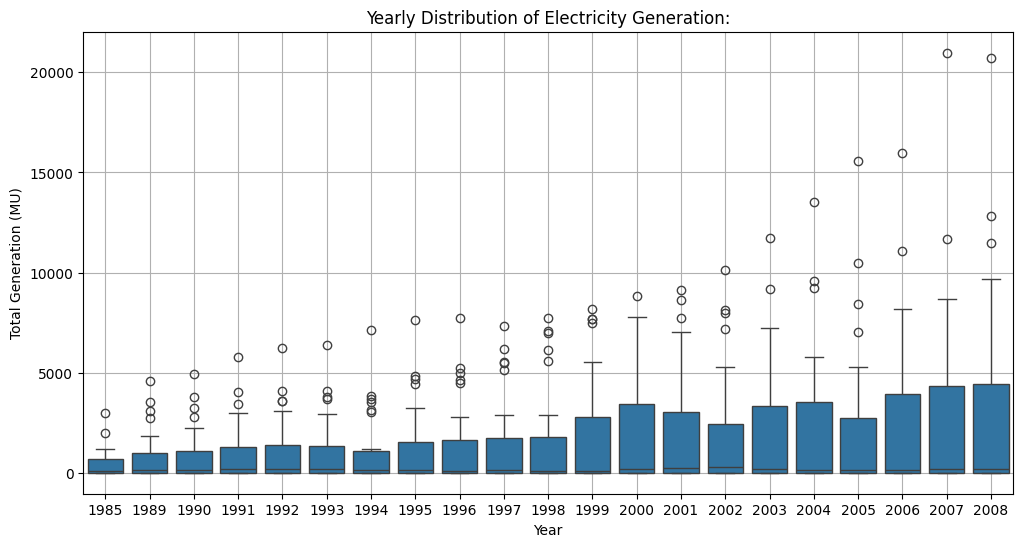

In [ ]:
# Box Plot for yearly Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=electricity_data, x='Year', y='Total (Calculated)')
plt.title('Yearly Distribution of Electricity Generation:')
plt.xlabel('Year')
plt.ylabel('Total Generation (MU)')
plt.grid()
plt.show()


# HydroPower Generation

In [19]:
df = pd.read_csv('HydroInflowandGen.csv')
print(df)

     Year RESERVOIR SCHEME  INFLOWS (MCM)  GENERATION (GWH)
0    1985         Balimela        2798.00            872.00
1    1985           Bhakra       17524.00           5995.00
2    1985     Gandhi Sagar        3296.00            291.00
3    1985          Hirakud       36673.00           1009.00
4    1985           Idukki        1714.00           2511.00
..    ...              ...            ...               ...
473  2011             Supa        3669.79            164.77
474  2011            Tehri        8694.28            147.40
475  2011             UKAI        8294.80            100.05
476  2011  Upper Indravati        1558.50             89.88
477  2011      Upper Kolab         748.75             98.06

[478 rows x 4 columns]


In [20]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Year                0
RESERVOIR SCHEME    0
INFLOWS (MCM)       0
GENERATION (GWH)    0
dtype: int64


In [21]:
from scipy import stats
import numpy as np

In [22]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
threshold = 3
# Filter the dataset to remove outliers
df_no_outliers_z = df[(z_scores < threshold).all(axis=1)]
print(f"\nRows after removing outliers using Z-score method: {df_no_outliers_z.shape[0]}")


Rows after removing outliers using Z-score method: 461


In [23]:
import matplotlib.pyplot as plt

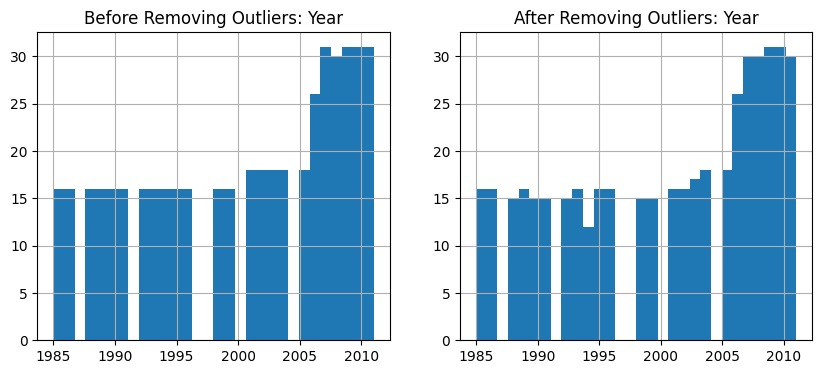

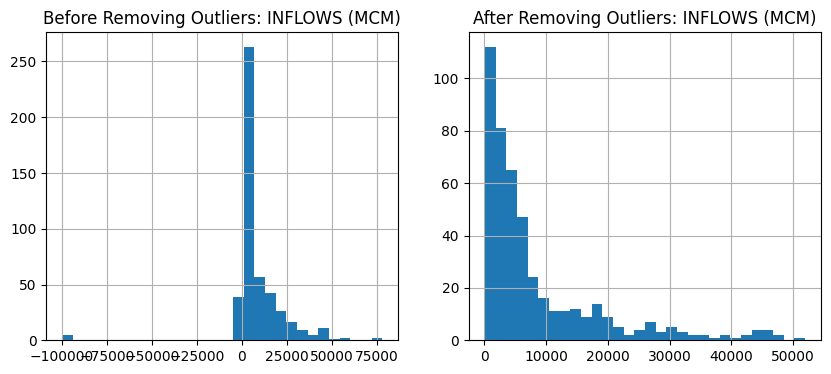

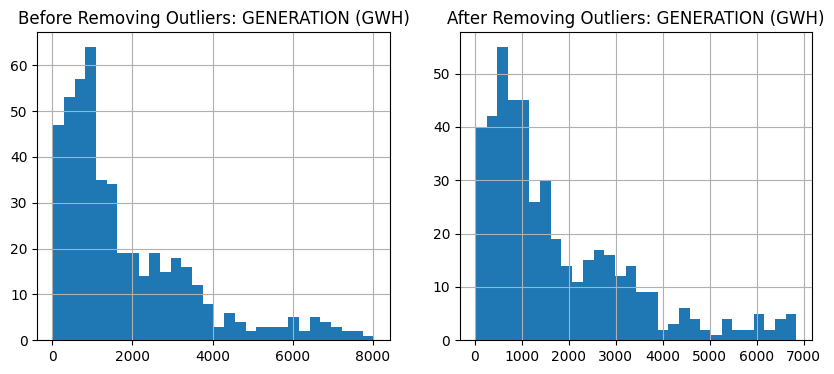

In [24]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Before removing outliers
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    plt.title(f'Before Removing Outliers: {col}')

    # After removing outliers
    plt.subplot(1, 2, 2)
    df_no_outliers_z[col].hist(bins=30)
    plt.title(f'After Removing Outliers: {col}')
    plt.show()

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Select only numeric columns for correlation
numeric_cols_only = df_no_outliers_z.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_cols_only.corr()

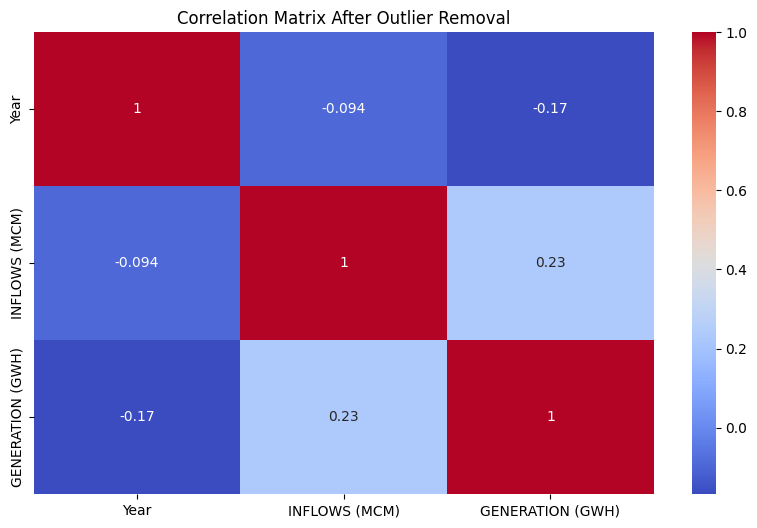

In [27]:
# Plot heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Outlier Removal')
plt.show()

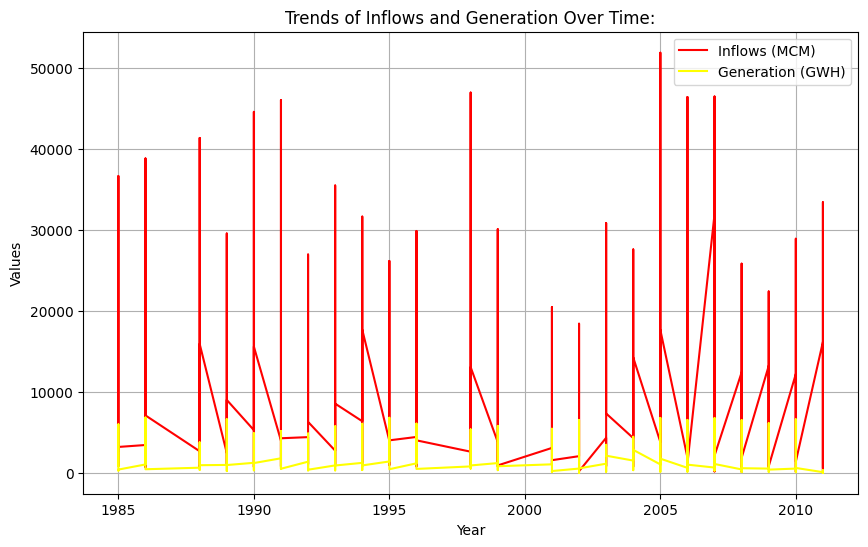

In [28]:
# Line plot for inflows and generation over years
plt.figure(figsize=(10, 6))
plt.plot(df_no_outliers_z['Year'], df_no_outliers_z['INFLOWS (MCM)'], label='Inflows (MCM)', color='red')
plt.plot(df_no_outliers_z['Year'], df_no_outliers_z['GENERATION (GWH)'], label='Generation (GWH)', color='yellow')
plt.title('Trends of Inflows and Generation Over Time:')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

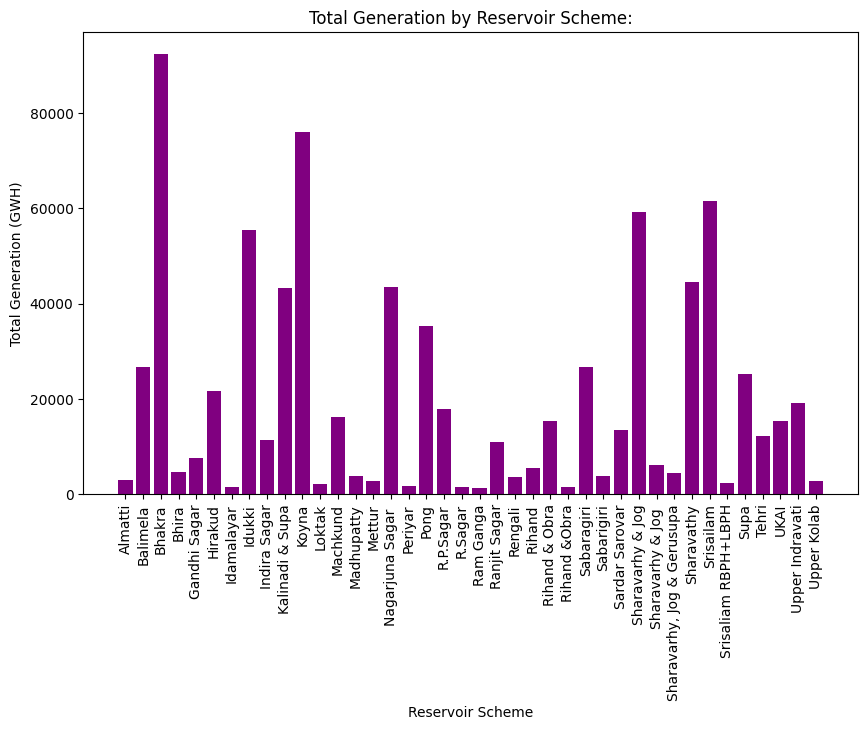

In [29]:
# Bar plot for total generation by each reservoir scheme
plt.figure(figsize=(10, 6))
df_gen_by_reservoir = df_no_outliers_z.groupby('RESERVOIR SCHEME')['GENERATION (GWH)'].sum().reset_index()

plt.bar(df_gen_by_reservoir['RESERVOIR SCHEME'], df_gen_by_reservoir['GENERATION (GWH)'], color='purple')
plt.title('Total Generation by Reservoir Scheme:')
plt.xlabel('Reservoir Scheme')
plt.ylabel('Total Generation (GWH)')
plt.xticks(rotation=90)
plt.show()

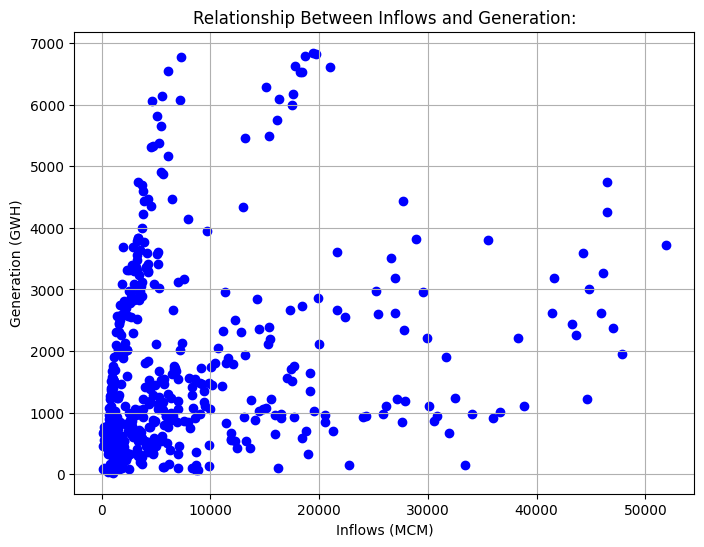

In [30]:
# Scatter plot to show relationship between inflows and generation
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers_z['INFLOWS (MCM)'], df_no_outliers_z['GENERATION (GWH)'], color='blue')
plt.title('Relationship Between Inflows and Generation:')
plt.xlabel('Inflows (MCM)')
plt.ylabel('Generation (GWH)')
plt.grid(True)
plt.show()

# Inter-State Energy Transfer

In [31]:
data = pd.read_csv('InterstateEnergyTransfer.csv')
print(data)

      Year      NAME OF SUPPLIER              NAME OF PURCHASER  \
0     1985  Madhya Pradesh S.E.B          Andhra Pradesh S.E.B.   
1     1985          Assam S.E.B.              Arunachal Pradesh   
2     1985     Arunachal Pradesh                   Assam S.E.B.   
3     1985       Meghalaya S.E.B                   Assam S.E.B.   
4     1985              Nagaland                   Assam S.E.B.   
...    ...                   ...                            ...   
1442  2004     West Bengal S.E.B  Uttaranchal Power Corporation   
1443  2004                Bhutan              West Bengal S.E.B   
1444  2004  Damodar Valley Corp.              West Bengal S.E.B   
1445  2004                GRIDCO              West Bengal S.E.B   
1446  2004               Tripura              West Bengal S.E.B   

      ENERGRY TRANSFERED (GWH)  
0                       145.79  
1                         7.20  
2                         1.53  
3                       235.48  
4                        26.03

In [32]:
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Year                        0
NAME OF SUPPLIER            0
NAME OF PURCHASER           0
ENERGRY TRANSFERED (GWH)    0
dtype: int64


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Handling Outliers using IQR method
Q1 = data['ENERGRY TRANSFERED (GWH)'].quantile(0.25)
Q3 = data['ENERGRY TRANSFERED (GWH)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [35]:
# Removing outliers
data_cleaned = data[(data['ENERGRY TRANSFERED (GWH)'] >= lower_bound) &
                    (data['ENERGRY TRANSFERED (GWH)'] <= upper_bound)]

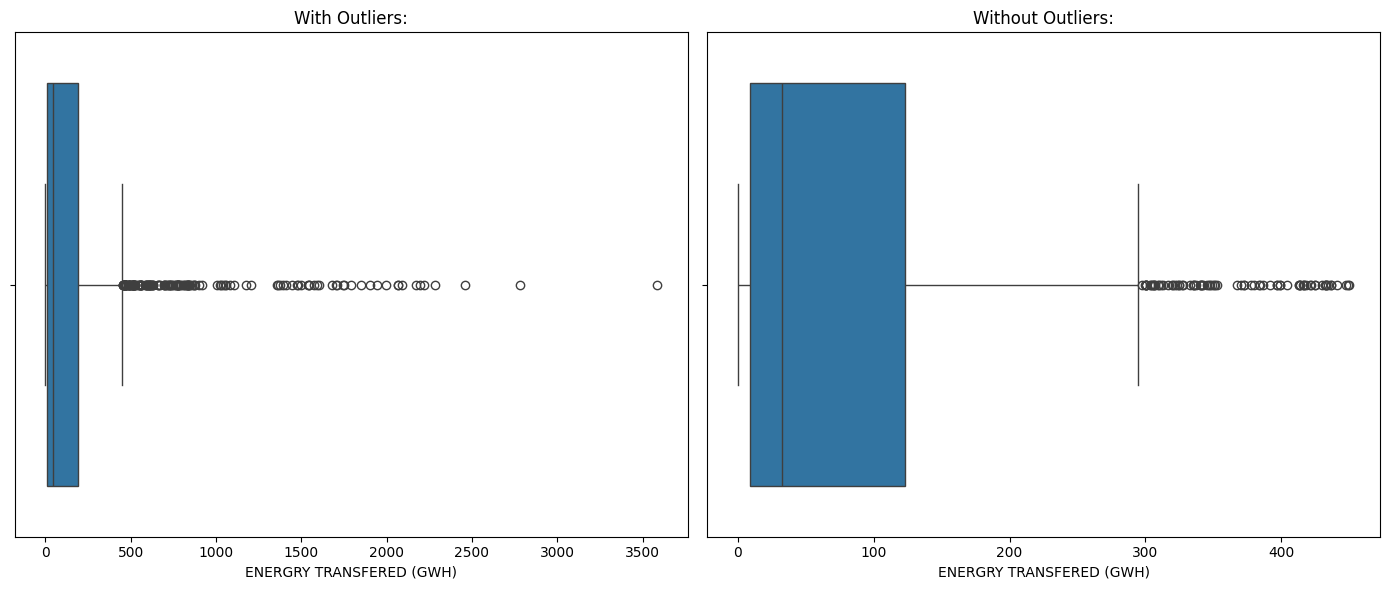

In [36]:
# Visualize the difference between having outliers and not having outliers
plt.figure(figsize=(14,6))

# Box plot with outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.boxplot(x='ENERGRY TRANSFERED (GWH)', data=data)
plt.title('With Outliers:')

# Box plot without outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(x='ENERGRY TRANSFERED (GWH)', data=data_cleaned)
plt.title('Without Outliers:')

plt.tight_layout()
plt.show()

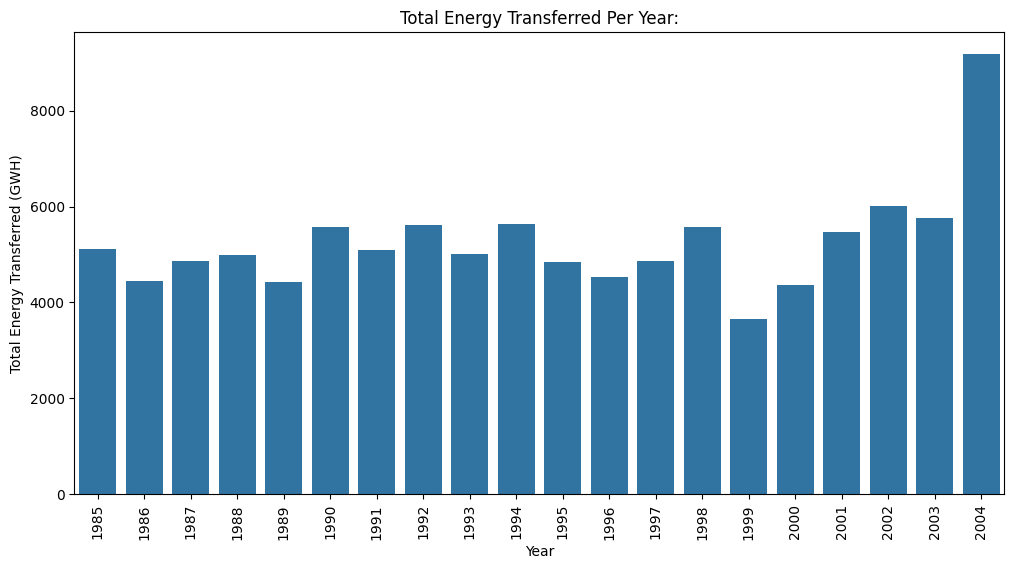

In [37]:
# Bar Plot - Total Energy Transferred per Year
yearly_transfer = data_cleaned.groupby('Year')['ENERGRY TRANSFERED (GWH)'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='ENERGRY TRANSFERED (GWH)', data=yearly_transfer)
plt.xticks(rotation=90)
plt.title('Total Energy Transferred Per Year:')
plt.xlabel('Year')
plt.ylabel('Total Energy Transferred (GWH)')
plt.show()

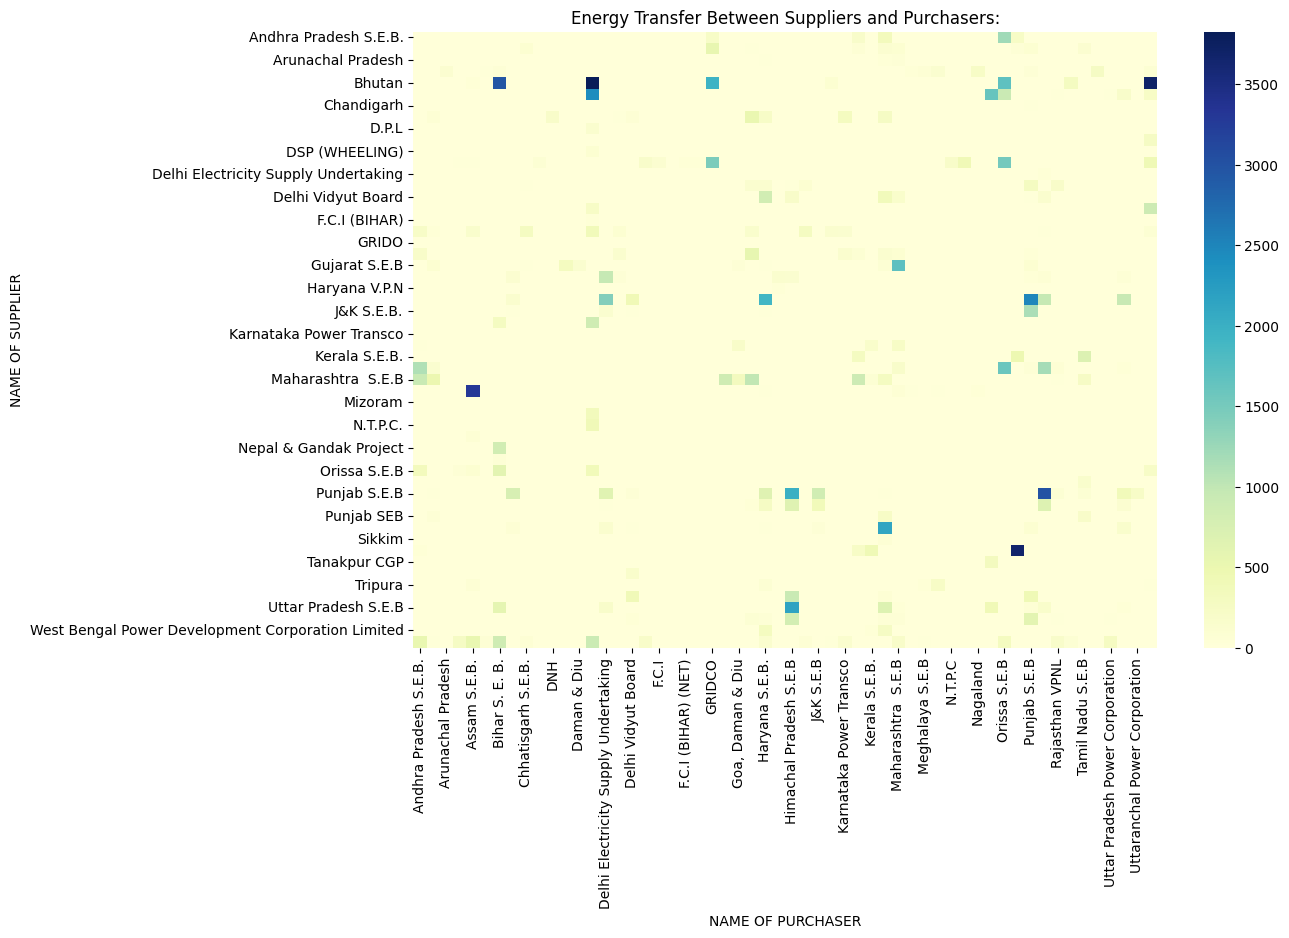

In [38]:
# Heatmap - Energy Transfer Matrix between Suppliers and Purchasers
transfer_matrix = data_cleaned.pivot_table(values='ENERGRY TRANSFERED (GWH)',
                                           index='NAME OF SUPPLIER',
                                           columns='NAME OF PURCHASER',
                                           aggfunc='sum', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(transfer_matrix, cmap='YlGnBu', annot=False)
plt.title('Energy Transfer Between Suppliers and Purchasers:')
plt.show()

# New section

In [1]:
# Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the datasets into pandas DataFrames
energy_req_df = pd.read_csv('EnergyReq.csv')
hydro_inflow_gen_df = pd.read_csv('HydroInflowandGen.csv')
interstate_energy_transfer_df = pd.read_csv('InterstateEnergyTransfer.csv')

In [2]:
energy_req_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               570 non-null    int64  
 1   State              570 non-null    object 
 2   Requirement (MU)   570 non-null    float64
 3   Availability (MU)  570 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.9+ KB


In [3]:
hydro_inflow_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              478 non-null    int64  
 1   RESERVOIR SCHEME  478 non-null    object 
 2   INFLOWS (MCM)     478 non-null    float64
 3   GENERATION (GWH)  478 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.1+ KB


In [4]:
interstate_energy_transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1447 non-null   int64  
 1   NAME OF SUPPLIER          1447 non-null   object 
 2   NAME OF PURCHASER         1447 non-null   object 
 3   ENERGRY TRANSFERED (GWH)  1447 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 45.3+ KB


In [5]:
energy_data_cleaned = energy_req_df[['Year', 'Requirement (MU)']]
df_no_outliers = hydro_inflow_gen_df[['Year', 'INFLOWS (MCM)', 'GENERATION (GWH)']]
data_cleaned = interstate_energy_transfer_df[['Year', 'ENERGRY TRANSFERED (GWH)']]

In [6]:
df = pd.merge(energy_data_cleaned, df_no_outliers, on='Year')
df = pd.merge(df, data_cleaned, on='Year')
df = df.dropna()    

In [7]:
X = df[['INFLOWS (MCM)', 'GENERATION (GWH)', 'ENERGRY TRANSFERED (GWH)']]  
y = df['Requirement (MU)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)